<a href="https://colab.research.google.com/github/LuisCastroV/ADA-Informes/blob/main/Informe5_BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento por cubos (*Bucket Sort o Bin Sort*)
---
**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Entrada para el informe:**  Arreglo de 10 números $[.78,.17,.39,.26,.72,.94,.21,.12,.23,.68]$.

**Salida**: Arreglo ordenado de la secuencia de entrada $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

**Salida para el informe:** Arreglo de 10 números ordenada de menor a mayor quedando $[.12,.17,.21,.23,.26,.39,.68,.72,.78,.94]$, quedando $.12\leq.17\leq.21\leq.23\leq.26\leq.39\leq.68\leq.72\leq.78\leq.94$.

---
**Imagen referencial de ordenamiento por casilleros:**

![image](https://upload.wikimedia.org/wikipedia/commons/6/61/Bucket_sort_1.png)

![image](https://upload.wikimedia.org/wikipedia/commons/3/39/Bucket_sort_2.png)

**Breve información:** Es una generalización de Pigeonhole Sort, un algoritmo de clasificación que es adecuado para clasificar listas de elementos donde el número de elementos y el número de valores clave posibles son aproximadamente los mismos. También se puede considerar primo de Radix Sort en el aspecto del dígito más significativo, ya que este algoritmo de ordenación es no comparativo, este evita las comparaciones insertando elementos en cubos. Bucket Sort se puede implementar con comparaciones y, por lo tanto, también se puede considerar un algoritmo de ordenación de comparación, como lo son el Quick Sort, Heap Sort y Insertion Sort.


#1.1. Algunas aplicaciones del algoritmo *Bucket Sort*:

Se usa normalmente en uno de dos escenarios:

- El primer escenario es acelerar el proceso de clasificación. El proceso de colocar $valores$ en cubos y luego clasificarlos en cantidades más pequeñas es mucho más rápido que una clasificación lineal como el metodo Bubble Sort, sin embargo, Bucket Sort usa más memoria que los algoritmos lineales.

- El segundo escenario del Bucket Sort es asignar prioridad u organizar conjuntos de datos menos estructurados. Este puede ser usado para organizar una lista de tareas, asignar prioridades u ordenar las cosas por la cantidad de tiempo que pueden tomar.

Algunas ventajas:
- Debido a la distribución uniforme, es asintóticamente rápido.
- Reduce el número de comparaciones.

Algunas desventajas: 
- Solo es bueno para ordenar datos distribuidos uniformemente en el rango $[0, 1]$.
- Es ineficaz si tenemos una gran variedad, ya que aumenta el costo.

# 2. Bucket Sort

El siguiente código muestra una implementación del algoritmo **Bucket Sort**.

# 2.1. Código

# 2.1.1. Código de Insertion Sort

In [1]:
def insertion_sort(a):
  n=len(a)

  for w in range(1,n):
    key=a[w]
    j=w-1

    while j>-1 and key <a[j]:
      a[j+1]=a[j]
      j-=1
    a[j+1]=key

  return a 

# 2.1.2. Código de Bucket Sort

In [2]:
def bucketSortInsertion(A):
  bucket = []
  k=0
  for i in range(10):
      bucket.append([])
  for j in A:
    index_b=int(10*j)
    if index_b == 10:
      bucket[9].append(j)
    else:
      bucket[index_b].append(j)
  for x in range(10):
    insertion_sort(bucket[x])
    if (len(bucket[x]) == 0):
      print("El cubo",x+1,"no contiene elementos.")
    else:
      print("El cubo",x+1,"contiene",len(bucket[x]),"elementos, estos son =",bucket[x],end=".\n")
  
  for a in range(10):
    for b in range(len(bucket[a])):
      A[k]=bucket[a][b]
      k+=1
  return A
  
array = [.78,.17,.39,.26,.72,.94,.21,.12,.23,.68]
print("Arreglo inicial =",array)
bucketSortInsertion(array)
print("Arreglo final =",array)

Arreglo inicial = [0.78, 0.17, 0.39, 0.26, 0.72, 0.94, 0.21, 0.12, 0.23, 0.68]
El cubo 1 no contiene elementos.
El cubo 2 contiene 2 elementos, estos son = [0.12, 0.17].
El cubo 3 contiene 3 elementos, estos son = [0.21, 0.23, 0.26].
El cubo 4 contiene 1 elementos, estos son = [0.39].
El cubo 5 no contiene elementos.
El cubo 6 no contiene elementos.
El cubo 7 contiene 1 elementos, estos son = [0.68].
El cubo 8 contiene 2 elementos, estos son = [0.72, 0.78].
El cubo 9 no contiene elementos.
El cubo 10 contiene 1 elementos, estos son = [0.94].
Arreglo final = [0.12, 0.17, 0.21, 0.23, 0.26, 0.39, 0.68, 0.72, 0.78, 0.94]


# 2.2. Descripción del algoritmo

# 2.2.1. Descripción de Insertion Sort

El algoritmo recibe como entrada una lista o arreglo $a$ de $n$ elementos a ordenar. El ordenamiento consiste en desplazar los números dentro del arreglo en caso de que fuese necesario para finalmente ubicar el elemento a ordenar en su posición correspondiente.

- Los elementos de la lista se recorren desde la posición $1$ hasta la posición $n$, no desde la posición $0$ porque este no posee antecesor.
- Si el elemento $a[i]$ es mayor que su antecesor, no necesita ser movido.
- Si el elemento $a[i]$ es menor que su antecesor, debe ser movido hacia la izquierda hasta que su elemento antecesor sea menor, o llegar al inicio de la lista.
- Siempre se recorre el arreglo completo menos su primer elemento, independiente de su largo.

**Imagen del pseudocódigo de Insertion Sort:**

![image](https://i.stack.imgur.com/U14ab.png)

# 2.2.2. Descripción de Bucket Sort

El algoritmo recibe como entrada una lista o arreglo $a$ de $n$ elementos a ordenar. El ordenamiento consiste en distribuir todos los elementos a ordenar entre un número finito de cubos. Cada casillero solo puede contener los elementos que cumplan unas determinadas condiciones, estas deben ser excluyentes entre sí, para evitar que un elemento pueda ser clasificado en dos casilleros distintos. Después cada uno de estos cubos se ordena individualmente con Insertion Sort para despúes concatenarlos.

- Crear n cubos vacíos.

- Para cada elemento de la matriz $a[i]$.

- - Insertar $a[i]$ en el cubo $[n*array[i]]$

- Clasificar los cubos individuales utilizando la ordenación por inserción.

- Concatenar todos los cubos ordenados.

**Imagen del pseudocódigo de Bucket Sort:**

![image](https://algoparc.ics.hawaii.edu/~nodari/teaching/s15/Notes/Topic-10/pseudocode-bucket-sort.jpg)

# 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$a=[.99,.45,.76,.77]$

Se crearán $10$ baldes, iniciando desde el $0$ al $9$, donde el $0$ corresponde a el cubo número $1$, y así sucesivamente.

Luego se agregarán los elementos a cada balde que le corresponda por su primer dígito a la derecha del punto:

- El $0.99$ se ingresará al $bucket[9]$ que sería el cubo $10$.
- El $0.45$ se ingresará al $bucket[4]$ que sería el cubo $5$.
- El $0.76$ se ingresará al $bucket[6]$ que sería el cubo $7$.
- El $0.77$ se ingresará al $bucket[6]$ que sería el cubo $7$.

Posteriormente se ordena cada balde de menor a mayor con Insertion Sort.

Finalmente los baldes con sus elementos proceden a ubicarse en la posición que les corresponde en el arreglo, gracias a los baldes con elementos y el tamaño de estos.

La salida sería $a=[.45,.76,.77,.99]$.

#3. Tiempo de ejecución 


#3.1. Teorema (tiempo de ejecución)

## **3.1.1. Insertion Sort**

> **Mejor caso:** Corresponde cuando el arreglo está ordenado, ejecutándose el ciclo únicamente $n$ veces *(n = total de elementos)*, sin necesidad de intercambiar posiciones, ya que sólo recorre una vez.
>
> $$T(n) = O(n)$$
>
> **Caso promedio:** Este se da cuando los elementos no están en orden ascendiente ni descendiente.
>
> $$T(n) = O(n^2)$$
>
> **Peor caso:** Sucede cuando los elementos están ordenados de manera contraria a como serán ordenados, cada elemento tendrá que ser comparado con todos los elementos anteriores.
>
> $$T(n) = O(n^2)$$

## **3.1.2. Bucket Sort**

Excluyendo el tiempo tomado por el Insertion Sort, Bucket Sort toma tiempo lineal. Así debemos cuantificar cuanto tiempo toman las $n$ llamadas a Insertion Sort.

![image](https://i.imgur.com/tnKDYsv.jpg)

Pero, dependiendo el caso, no tienen la misma complejidad:

> **Mejor Caso:** El mejor caso junto al caso promedio corresponde al mismo tiempo de ejecución. Corresponde cuando los elementos están distribuidos aleatoriamente, así dando resultados muy eficientes.
> $$T(n) = O(n + k)$$
>
> *Donde n corresponde al número de elementos y k el rango de valores.*
>
> **Peor Caso:** Se produce cuando muchos elementos están muy cerca y se agrupan en el mismo balde. Esto elimina todas las ventajas de dividir las entradas en cubos.
> $$T(n) = O(n^2)$$
>
> *Donde n corresponde al número de elementos.*

#4. Correctitud


## **4.1 Insertion Sort**

El algoritmo **Insertion Sort** ordena dentro del mismo arreglo los elementos, sin la necesidad de crear un auxiliar.

## Prueba del Teorema

Previamente observamos que en cada iteración agregamos un nuevo elemento y lo insertamos en la posición correspondiente.

Para probarlo utilizaremos la **propiedad invariante de bucle**:

- El arreglo que utilizamos para realizar el algoritmo, contiene los mismos elementos, ya que sólo se mueven durante la ejecución pero no cambian. 

> **Incialización:** Al comienzo de la primera iteración, los datos desde la posición $0$ hasta $i-1$ cumplen la propiedad ya que estos no cambian en el proceso.
>
> **Mantención:** En cada iteración se cumple la propiedad, ya que los elementos siguen siendo los mismos con la diferencia de que están en distinto orden, es decir los elementos mayores del arreglo están ordenados de mayor a menor.

## **4.2. Bucket Sort**
Para poder probar la correctitud del **Bucket Sort**, utilizaremos **inducción matemática**, para probar debemos:

1. Probar $P(n)$ para un caso base, por ejemplo $P(1)$.

2. Probar que si $P(m)$ es cierto $m < n$, entonces $P(n)$ también lo es.

> **Caso Base:** Van haber casos en los que el balde tendrá sólo un elemento, por lo que se asume que están ordenados, además que los baldes contendrán elementos menores a los baldes siguientes.
>
> **Caso Promedio:** Por lo que para $P(m)$ al utilizar **Insertion Sort** nos aseguramos que los baldes contienen los mismos elementos pero ordenados de menor a mayor.
>
>Como cada balde contiene los datos ordenados luego de aplicar el **Insertion Sort**, se puede decir que existe un arreglo $A'$ con los elementos de $A$ ordenados de menor a mayor, ahora se procede a colocar los elementos de $A'$ en $A$ en las posiciones que les corresponde.

#5. Experimento

#5.1. Bucket Sort vs Radix Sort vs Counting Sort 

#5.1.1. Código de Bucket Sort

In [3]:
def bucketSort(array):
  maximo = max(array)
  longitud = len(array)
  tamanho = maximo/longitud
  buckets = [[] for i in range(longitud)]
 
  for i in range(longitud):
      index = int(array[i]/tamanho)
      if index != longitud:
          buckets[index].append(array[i])
      else:
          buckets[longitud-1].append(array[i])
 
  for i in range(len(array)):
      buckets[i] = sorted(buckets[i])
 
  final = []
  for i in range(longitud):
      final = final + buckets[i]      
  return final

#5.1.2. Código de Radix Sort

In [4]:
def countingSort(array, place):
    longitud = len(array)
    salida = [0] * longitud
    contador = [0] * 10

    for i in range(0, longitud):
        index = array[i] // place
        contador[index % 10] += 1

    for i in range(1, 10):
        contador[i] += contador[i - 1]

    i = longitud - 1
    while i >= 0:
        index = array[i] // place
        salida[contador[index % 10] - 1] = array[i]
        contador[index % 10] -= 1
        i -= 1

    for i in range(0, longitud):
        array[i] = salida[i]


def radixSort(array):
    maximo = max(array)
    lugar = 1
    while maximo // lugar > 0:
        countingSort(array,lugar)
        lugar *= 10

#5.1.3. Código de Counting Sort 

In [5]:
def countingSortOrigin(array):
    longitud = len(array)
    salida = [0] * longitud
    contador = [0] * 1000

    for i in range(0, longitud):
        contador[array[i]] += 1

    for i in range(1, 1000):
        contador[i] += contador[i - 1]

    i = longitud - 1
    while i >= 0:
        salida[contador[array[i]] - 1] = array[i]
        contador[array[i]] -= 1
        i -= 1

    for i in range(0, longitud):
        array[i] = salida[i]

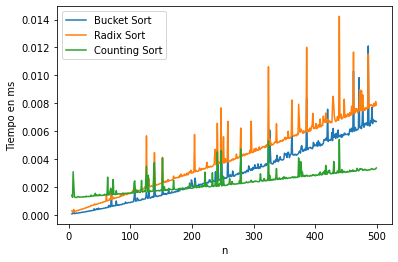

In [11]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

w,x,y,z = [],[],[],[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)  
  b = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)
  c = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  d = repeat(setup="from __main__ import countingSortOrigin", stmt=f"countingSortOrigin({a})", repeat=1, number=10)
  x.append(n)
  y.append(b)
  w.append(c)
  z.append(d)

plt.plot(x,y)
plt.plot(x,w)
plt.plot(x,z)
plt.legend(["Bucket Sort","Radix Sort","Counting Sort"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Se puede observar que **Couting Sort** en un principio es el "*menos eficiente*" en tiempo de ejecución, hasta aproximadamente en los problemas que están alrededor de los 100 elementos, ahora el algoritmo que ocupará el puesto como el "*menos eficiente*" será el **Radix Sort**. Siguiendo el comportamiento de **Couting Sort** se puede observar que alrededor de los problemas con aproximadamente 200 elementos, el algoritmo que tomará el segundo puesto de "*menos eficiente*" será el **Bucket Sort** y el algortimo que se coronará como el "*más eficiente*" en este versus será el **Couting Sort** a pesar de haber iniciado como el peor de todos.

#5.2. Bucket Sort vs Pigeonhole Sort

#5.2.1. Código de Pigeonhole Sort

In [7]:
def PigeonholeSort(a):
    mini = min(a)
    maxim = max(a)
    tamanho = maxim - mini + 1
    agujero = [0] * tamanho
    for i in a:
        agujero[i - mini] += 1
    j = 0
    for count in range(tamanho):
        while agujero[count] > 0:
            agujero[count] -= 1
            a[j] = count + mini
            j += 1

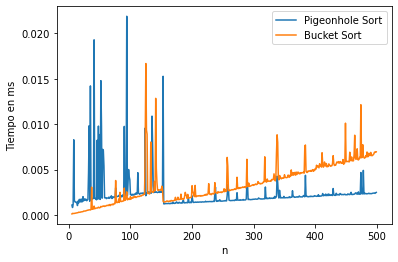

In [8]:
x,y,z = [],[],[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)  
  b = repeat(setup="from __main__ import PigeonholeSort", stmt=f"PigeonholeSort({a})", repeat=1, number=10)
  c = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)
  x.append(n)
  y.append(b)
  z.append(c)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Pigeonhole Sort","Bucket Sort"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Se puede observar que **Pigeonhole Sort** en un principio es el "*menos eficiente*" en tiempo de ejecución, hasta aproximadamente en los problemas que están alrededor de los 150 elementos, ahora el algoritmo que ocupará el puesto como el "*menos eficiente*" será el **Bucket Sort**. Donde el algortimo que se coronará como el "*más eficiente*" en este versus será el **Pigeonhole Sort** a pesar de haber iniciado como el peor de todos.

#5.3. Bucket Sort vs Radix Sort vs Counting Sort vs Bubble Sort

#5.3.1. Código de Bubble Sort

In [9]:
def bubbleSort(array):
  for i in range(len(array)):
    for j in range(0, len(array) - i - 1):
      if array[j] > array[j + 1]:
        temp = array[j]
        array[j] = array[j+1]
        array[j+1] = temp

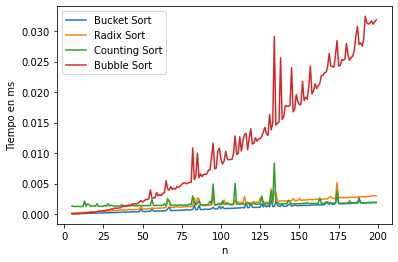

In [10]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

v,w,x,y,z = [],[],[],[],[]

for n in range(5,200):

  a = random.sample(range(1, 200), n)  
  b = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)
  c = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  d = repeat(setup="from __main__ import countingSortOrigin", stmt=f"countingSortOrigin({a})", repeat=1, number=10)
  e = repeat(setup="from __main__ import bubbleSort", stmt=f"bubbleSort({a})", repeat=1, number=10)
  x.append(n)
  y.append(b)
  w.append(c)
  z.append(d)
  v.append(e)

plt.plot(x,y)
plt.plot(x,w)
plt.plot(x,z)
plt.plot(x,v)
plt.legend(["Bucket Sort","Radix Sort","Counting Sort","Bubble Sort"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Esta gráfica ocupa un rango más acotado apoyado por los resultlados del gráfico 5.1. donde los cambios de eficiencia en el tiempo de ejecución esta alrededor del 100 y 200. Se vuelve a observar que **Couting Sort** en un principio es el "*menos eficiente*" en tiempo de ejecución, hasta aproximadamente en los problemas que están alrededor de los 30 elementos, ahora el algoritmo que ocupará el puesto como el "*menos eficiente*" será el **Bubble Sort**. Y se vuelven a repetir los resultados obtenidos en la grafica de 5.1.. Obteniendo finalmente que los algoritmos "*más eficientes*" en este versus serán el **Couting Sort** a pesar de haber iniciado como el peor de todos y el **Bucket Sort**.